# Classification

# Dataset : Baseball
## Variable Descriptions
Format: variable (type) - description

1. Player (categorical) - name of the player
2. Number_seasons (numerical) - number of seasons played by the player
3. Games_played (numerical) - number of games played by the player
4. At_bats (numerical) - number of At_bats made by the player
5. Runs (numerical) - number of Runs made by the player
6. Hits (numerical) - number of hits made by the player
7. Doubles (numerical) -  number of doubles made by the player
8. Triples (numerical) -  number of triples made by the player
9. Home_runs (numerical) -  number of home_runs made by the player
10. RBIs (numerical) - number of RBIs made by the player
11. Walks (numerical) - number of walks made by the player
12. Strikeouts (numerical) - number of strikeouts made by the player
13. Batting_average (numerical) - batting average= (number of hits) / (number of At-bats)
14. On_base_pct (numerical) - On base percentage (OBP)=(Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies).
15. Slugging_pct (numerical) - slugging percentage= total bases divided by at bats.
16. Fielding_ave (numerical) - fielding average or fielding Percentage (FPCT) = (put outs + assists) / (put outs + assists + errors).
17. Position (categorical) - Position of players on the field
18. Hall_of_Fame (numerical)(Target variable)- three classes (0,1 and 2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
baseball = pd.read_csv("C:/Users/sahit/Documents/baseball1.csv")
baseball.head()

,Player,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,HANK_AARON,23,3298,12364,2174.0,3771.0,624,98.0,755,2297,1402.0,1383.0,0.305,0.377,0.555,0.980,Outfield,1
1,JERRY_ADAIR,13,1165,4019,378.0,1022.0,163,19.0,57,366,208.0,499.0,0.254,0.294,0.347,0.985,Second_base,0
2,SPARKY_ADAMS,13,1424,5557,844.0,1588.0,249,48.0,9,394,NaN,223.0,0.286,0.343,0.353,0.974,Second_base,0
3,BOBBY_ADAMS,14,1281,4019,591.0,1082.0,188,NaN,37,303,414.0,447.0,0.269,0.340,0.368,0.955,Third_base,0
4,JOE_ADCOCK,17,1959,6606,823.0,1832.0,295,35.0,336,1122,594.0,1059.0,0.277,0.339,0.485,0.994,First_base,0


In [3]:
baseball.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 18 columns):
Player             1340 non-null object
Number_seasons     1340 non-null int64
Games_played       1340 non-null int64
At_bats            1340 non-null int64
Runs               1229 non-null float64
Hits               1290 non-null float64
Doubles            1340 non-null int64
Triples            1296 non-null float64
Home_runs          1340 non-null int64
RBIs               1340 non-null int64
Walks              1280 non-null float64
Strikeouts         1262 non-null float64
Batting_average    1307 non-null float64
On_base_pct        1340 non-null float64
Slugging_pct       1293 non-null float64
Fielding_ave       1340 non-null float64
Position           1340 non-null object
Hall_of_Fame       1340 non-null int64
dtypes: float64(9), int64(7), object(2)
memory usage: 188.6+ KB


In [4]:
baseball.isnull().sum()   # We can see that 7 columns have missing values

Player               0
Number_seasons       0
Games_played         0
At_bats              0
Runs               111
Hits                50
Doubles              0
Triples             44
Home_runs            0
RBIs                 0
Walks               60
Strikeouts          78
Batting_average     33
On_base_pct          0
Slugging_pct        47
Fielding_ave         0
Position             0
Hall_of_Fame         0
dtype: int64

In [5]:
baseball.describe()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Hall_of_Fame
count,1340.000000,1340.000000,1340.000000,1229.000000,1290.000000,1340.000000,1296.000000,1340.000000,1340.000000,1280.000000,1262.000000,1307.000000,1340.000000,1293.000000,1340.000000,1340.000000
mean,13.485821,1331.263433,4534.612687,634.924329,1252.485271,203.225373,50.794753,85.109701,565.744776,445.210156,451.861331,0.268688,0.336064,0.385859,0.966370,0.144030
std,3.136279,519.165125,2094.191124,375.804366,649.887968,116.576053,40.925711,97.930043,357.163666,297.156422,328.198805,0.026115,0.033701,0.060961,0.025193,0.474284
min,10.000000,140.000000,252.000000,20.000000,3.000000,6.000000,0.000000,0.000000,21.000000,17.000000,0.000000,0.161000,0.194000,0.201000,0.820000,0.000000
25%,11.000000,958.750000,2979.500000,353.000000,773.250000,116.000000,22.000000,22.000000,307.750000,229.000000,219.000000,0.252000,0.315000,0.343000,0.957000,0.000000
50%,13.000000,1282.500000,4302.000000,575.000000,1170.000000,184.500000,40.500000,51.000000,486.000000,379.500000,369.500000,0.267000,0.335000,0.381000,0.973000,0.000000
75%,15.000000,1651.500000,5815.250000,843.000000,1613.000000,264.000000,69.000000,108.000000,735.250000,576.000000,605.000000,0.285000,0.357250,0.425000,0.983000,0.000000
max,26.000000,3562.000000,14053.000000,2246.000000,4256.000000,792.000000,309.000000,755.000000,2297.000000,2056.000000,2597.000000,0.366000,0.483000,0.690000,1.000000,2.000000


In [6]:
baseball.dtypes  # we have 2 object (categorical) columns

Player              object
Number_seasons       int64
Games_played         int64
At_bats              int64
Runs               float64
Hits               float64
Doubles              int64
Triples            float64
Home_runs            int64
RBIs                 int64
Walks              float64
Strikeouts         float64
Batting_average    float64
On_base_pct        float64
Slugging_pct       float64
Fielding_ave       float64
Position            object
Hall_of_Fame         int64
dtype: object

In [7]:
baseball['Hall_of_Fame'].value_counts()   # majority belongs to class 0

0    1215
2      68
1      57
Name: Hall_of_Fame, dtype: int64

It can be regarded as an imbalanced dataset since majority belongs to class 0. So we will stratify the target variable while splitting the data so that each fold contains similar amounts of class 0,1 and 2.

## Filling the missing values
We are grouping by position and using mean to fill the missing values.

In [8]:
baseball_grouped=baseball.groupby(['Position'])
baseball_imputed = baseball_grouped.transform(lambda grp: grp.fillna(grp.mean()))
baseball[['Runs','Hits','Triples','Walks','Slugging_pct','Batting_average','Strikeouts']] = baseball_imputed[['Runs','Hits','Triples','Walks','Slugging_pct','Batting_average','Strikeouts']]

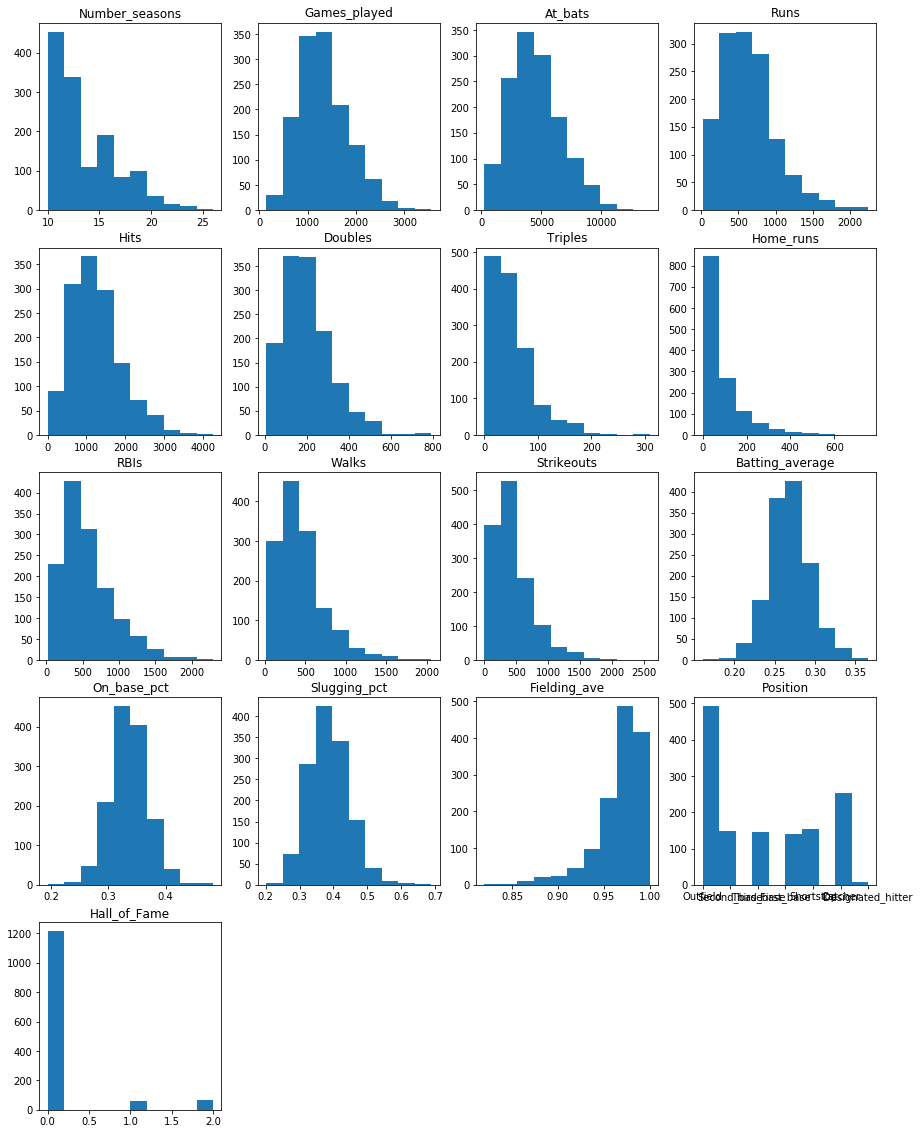

In [9]:
conti_vars = list(baseball.columns)[1:]
plt.figure(figsize=(15, 20))
for i, col in enumerate(conti_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(baseball[col])
    plt.title(col)

In [10]:
baseball.isnull().sum()    # no missing values now

Player             0
Number_seasons     0
Games_played       0
At_bats            0
Runs               0
Hits               0
Doubles            0
Triples            0
Home_runs          0
RBIs               0
Walks              0
Strikeouts         0
Batting_average    0
On_base_pct        0
Slugging_pct       0
Fielding_ave       0
Position           0
Hall_of_Fame       0
dtype: int64

In [11]:
# Removing 'Player' column as it is not useful in predicting the Hall_of_Fame
baseball = baseball.loc[:, baseball.columns != 'Player']
baseball.head()

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position,Hall_of_Fame
0,23,3298,12364,2174.0,3771.0,624,98.000000,755,2297,1402.000000,1383.0,0.305,0.377,0.555,0.980,Outfield,1
1,13,1165,4019,378.0,1022.0,163,19.000000,57,366,208.000000,499.0,0.254,0.294,0.347,0.985,Second_base,0
2,13,1424,5557,844.0,1588.0,249,48.000000,9,394,464.402878,223.0,0.286,0.343,0.353,0.974,Second_base,0
3,14,1281,4019,591.0,1082.0,188,47.542857,37,303,414.000000,447.0,0.269,0.340,0.368,0.955,Third_base,0
4,17,1959,6606,823.0,1832.0,295,35.000000,336,1122,594.000000,1059.0,0.277,0.339,0.485,0.994,First_base,0


## Converting categorical variables to numerical using one hot encoding 

In [12]:
# One hot encoding on 'Position' column
dummy =pd.get_dummies(baseball['Position'],columns='Position',prefix='Position')
dummy

,Position_Catcher,Position_Designated_hitter,Position_First_base,Position_Outfield,Position_Second_base,Position_Shortstop,Position_Third_base
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
1335,0,0,0,1,0,0,0
1336,1,0,0,0,0,0,0
1337,0,0,0,0,0,0,1
1338,0,0,0,0,0,0,1


In [13]:
baseball=pd.concat([baseball, dummy], axis=1)
baseball.drop(['Position'],axis=1,inplace= True)

In [14]:
X = baseball.loc[:, baseball.columns != 'Hall_of_Fame']   #all columns except the Hall_of_Fame
X

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,...,On_base_pct,Slugging_pct,Fielding_ave,Position_Catcher,Position_Designated_hitter,Position_First_base,Position_Outfield,Position_Second_base,Position_Shortstop,Position_Third_base
0,23,3298,12364,2174.0,3771.0,624,98.000000,755,2297,1402.000000,...,0.377,0.555000,0.980,0,0,0,1,0,0,0
1,13,1165,4019,378.0,1022.0,163,19.000000,57,366,208.000000,...,0.294,0.347000,0.985,0,0,0,0,1,0,0
2,13,1424,5557,844.0,1588.0,249,48.000000,9,394,464.402878,...,0.343,0.353000,0.974,0,0,0,0,1,0,0
3,14,1281,4019,591.0,1082.0,188,47.542857,37,303,414.000000,...,0.340,0.368000,0.955,0,0,0,0,0,0,1
4,17,1959,6606,823.0,1832.0,295,35.000000,336,1122,594.000000,...,0.339,0.485000,0.994,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,11,1234,4131,572.0,1093.0,159,22.000000,237,776,496.778252,...,0.331,0.486000,0.968,0,0,0,1,0,0,0
1336,19,1280,4546,617.0,1224.0,222,76.000000,26,620,390.000000,...,0.339,0.354012,0.952,1,0,0,0,0,0,0
1337,12,1095,3283,353.0,773.0,130,22.000000,91,352,246.000000,...,0.291,0.372000,0.941,0,0,0,0,0,0,1
1338,13,1456,5304,695.0,1566.0,275,105.000000,58,796,242.000000,...,0.331,0.419000,0.928,0,0,0,0,0,0,1


In [15]:
y = baseball.iloc[:, baseball.columns == 'Hall_of_Fame']  #taking only 'Hall_of_Fame' column
y

,Hall_of_Fame
0,1
1,0
2,0
3,0
4,0
...,...
1335,0
1336,0
1337,0
1338,0


In [16]:
baseball['Hall_of_Fame'].unique()

array([1, 0, 2], dtype=int64)

In [17]:
baseball['Hall_of_Fame'].sum()/baseball['Hall_of_Fame'].count()

0.14402985074626865

## Splitting Data

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [19]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle=True,stratify=y,test_size = 0.25)
print(X_train_org.shape, y_train.shape)
print (X_test_org.shape, y_test.shape)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

(1005, 22) (1005, 1)
(335, 22) (335, 1)


We are using MinMaxScaler since there is skewness in the histogram plots.

In [20]:
X_train

array([[0.        , 0.25511397, 0.21375263, ..., 0.        , 0.        ,
        0.        ],
       [0.13333333, 0.39099942, 0.41141946, ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.44301578, 0.42272299, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.44155465, 0.3879429 , ..., 0.        , 0.        ,
        0.        ],
       [0.13333333, 0.27440094, 0.27106731, ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.38018703, 0.30983262, ..., 0.        , 0.        ,
        0.        ]])

In [21]:
y_train=np.ravel(y_train, order = 'C')
y_train

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

## Hard voting classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [23]:
softmax_clf = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='multinomial',C=100,max_iter= 1000)
softmax_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(6)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(kernel='rbf',random_state=0,C= 100, gamma= 0.1,probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('sm', softmax_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (softmax_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9432835820895522
KNeighborsClassifier 0.9223880597014925
SVC 0.9462686567164179
VotingClassifier 0.9402985074626866


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print('softmax-Train score: {:.4f}'.format(softmax_clf.score(X_train, y_train)))
print('softmax-Test score: {:.4f}'.format(softmax_clf.score(X_test, y_test)))

y_soft_pred = softmax_clf.predict(X_test)

print(confusion_matrix(y_test, y_soft_pred))
print(classification_report(y_test, y_soft_pred))

softmax-Train score: 0.9532
softmax-Test score: 0.9433
[[302   1   1]
 [  3   7   4]
 [  9   1   7]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       304
           1       0.78      0.50      0.61        14
           2       0.58      0.41      0.48        17

    accuracy                           0.94       335
   macro avg       0.77      0.64      0.69       335
weighted avg       0.93      0.94      0.94       335



In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print('knn-Train score: {:.4f}'.format(knn_clf.score(X_train, y_train)))
print('knn-Test score: {:.4f}'.format(knn_clf.score(X_test, y_test)))

y_knn_pred = knn_clf.predict(X_test)

print(confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

knn-Train score: 0.9323
knn-Test score: 0.9224
[[303   1   0]
 [  9   1   4]
 [ 11   1   5]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       304
           1       0.33      0.07      0.12        14
           2       0.56      0.29      0.38        17

    accuracy                           0.92       335
   macro avg       0.61      0.45      0.49       335
weighted avg       0.89      0.92      0.90       335



In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print('svc-Train score: {:.4f}'.format(svm_clf.score(X_train, y_train)))
print('svc-Test score: {:.4f}'.format(svm_clf.score(X_test, y_test)))

y_svm_pred = svm_clf.predict(X_test)

print(confusion_matrix(y_test, y_svm_pred))
print(classification_report(y_test, y_svm_pred))

svc-Train score: 0.9672
svc-Test score: 0.9463
[[303   1   0]
 [  5   6   3]
 [  8   1   8]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       304
           1       0.75      0.43      0.55        14
           2       0.73      0.47      0.57        17

    accuracy                           0.95       335
   macro avg       0.81      0.63      0.70       335
weighted avg       0.94      0.95      0.94       335



In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print('voting-Train score: {:.4f}'.format(voting_clf.score(X_train, y_train)))
print('voting-Test score: {:.4f}'.format(voting_clf.score(X_test, y_test)))

y_voting_pred = voting_clf.predict(X_test)

print(confusion_matrix(y_test, y_voting_pred))
print(classification_report(y_test, y_voting_pred))

voting-Train score: 0.9562
voting-Test score: 0.9403
[[303   1   0]
 [  5   5   4]
 [  9   1   7]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       304
           1       0.71      0.36      0.48        14
           2       0.64      0.41      0.50        17

    accuracy                           0.94       335
   macro avg       0.77      0.59      0.65       335
weighted avg       0.93      0.94      0.93       335



## Soft voting classifier

In [28]:
softmax1_clf = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='multinomial',C=100,max_iter= 1000)
softmax1_clf.fit(X_train, y_train)
knn1_clf = KNeighborsClassifier(6)
knn1_clf.fit(X_train, y_train)
svm1_clf = SVC(kernel='rbf',random_state=0,C= 100, gamma= 0.1,probability = True)
svm1_clf.fit(X_train, y_train)

voting1_clf = VotingClassifier(estimators=[('sm1', softmax1_clf), ('knn1', knn1_clf), ('svc1', svm1_clf)], voting='soft')
voting1_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (softmax1_clf, knn1_clf, svm1_clf, voting1_clf):
    clf.fit(X_train, y_train)
    y_pred1 = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred1))


LogisticRegression 0.9432835820895522
KNeighborsClassifier 0.9223880597014925
SVC 0.9462686567164179
VotingClassifier 0.9432835820895522


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print('softmax-Train score: {:.4f}'.format(softmax1_clf.score(X_train, y_train)))
print('softmax-Test score: {:.4f}'.format(softmax1_clf.score(X_test, y_test)))

y_soft_pred1 = softmax1_clf.predict(X_test)

print(confusion_matrix(y_test, y_soft_pred1))
print(classification_report(y_test, y_soft_pred1))

softmax-Train score: 0.9532
softmax-Test score: 0.9433
[[302   1   1]
 [  3   7   4]
 [  9   1   7]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       304
           1       0.78      0.50      0.61        14
           2       0.58      0.41      0.48        17

    accuracy                           0.94       335
   macro avg       0.77      0.64      0.69       335
weighted avg       0.93      0.94      0.94       335



In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print('knn-Train score: {:.4f}'.format(knn1_clf.score(X_train, y_train)))
print('knn-Test score: {:.4f}'.format(knn1_clf.score(X_test, y_test)))

y_knn_pred1 = knn1_clf.predict(X_test)

print(confusion_matrix(y_test, y_knn_pred1))
print(classification_report(y_test, y_knn_pred1))

knn-Train score: 0.9323
knn-Test score: 0.9224
[[303   1   0]
 [  9   1   4]
 [ 11   1   5]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       304
           1       0.33      0.07      0.12        14
           2       0.56      0.29      0.38        17

    accuracy                           0.92       335
   macro avg       0.61      0.45      0.49       335
weighted avg       0.89      0.92      0.90       335



In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print('svc-Train score: {:.4f}'.format(svm1_clf.score(X_train, y_train)))
print('svc-Test score: {:.4f}'.format(svm1_clf.score(X_test, y_test)))

y_svm_pred1 = svm1_clf.predict(X_test)

print(confusion_matrix(y_test, y_svm_pred1))
print(classification_report(y_test, y_svm_pred1))

svc-Train score: 0.9672
svc-Test score: 0.9463
[[303   1   0]
 [  5   6   3]
 [  8   1   8]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       304
           1       0.75      0.43      0.55        14
           2       0.73      0.47      0.57        17

    accuracy                           0.95       335
   macro avg       0.81      0.63      0.70       335
weighted avg       0.94      0.95      0.94       335



In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print('voting-Train score: {:.4f}'.format(voting1_clf.score(X_train, y_train)))
print('voting-Test score: {:.4f}'.format(voting1_clf.score(X_test, y_test)))

y_voting_pred1 = voting1_clf.predict(X_test)

print(confusion_matrix(y_test, y_voting_pred1))
print(classification_report(y_test, y_voting_pred1))

voting-Train score: 0.9532
voting-Test score: 0.9433
[[303   1   0]
 [  4   6   4]
 [  8   2   7]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       304
           1       0.67      0.43      0.52        14
           2       0.64      0.41      0.50        17

    accuracy                           0.94       335
   macro avg       0.75      0.61      0.67       335
weighted avg       0.93      0.94      0.94       335



## Bagging

### Decision Tree Classifier

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=0,max_depth=6 ,criterion='gini',max_features=6,min_samples_leaf=4,min_samples_split=25,splitter='best')
dt_bc_parameters = {'max_samples': [100, 150, 200, 250, 300],
                  'n_estimators': [40, 50, 70, 100, 250, 500]}
                  
dt_bc = BaggingClassifier(dt, bootstrap=True, n_jobs=-1, random_state=0)
dt_grid = GridSearchCV(dt_bc, dt_bc_parameters,cv=10)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=6,
                                                                               max_features=6,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=4,
                                                                              

In [34]:
dt_grid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=6,
                                                        max_features=6,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=25,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
        

In [35]:
dt_grid.best_score_

0.9343465346534652

In [36]:
dt_grid.best_params_

{'max_samples': 200, 'n_estimators': 100}

## Using best parameters for Bagging on Decision tree classifier

In [37]:
dt_test = DecisionTreeClassifier(random_state=0,max_depth=6 ,criterion='gini',max_features=6,min_samples_leaf=4,min_samples_split=25,splitter='best')
dt_bctest = BaggingClassifier(dt_test, max_samples=200, n_estimators= 100, bootstrap=True, n_jobs=-1, random_state=0)
dt_bctest.fit(X_train, y_train)

print('Train score: {:.4f}'.format(dt_bctest.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dt_bctest.score(X_test, y_test)))

Train score: 0.9323
Test score: 0.9134


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_dtbc = dt_bctest.predict(X_test)

print(confusion_matrix(y_test, y_predict_dtbc))
print(classification_report(y_test, y_predict_dtbc))

[[302   2   0]
 [ 10   4   0]
 [ 15   2   0]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       304
           1       0.50      0.29      0.36        14
           2       0.00      0.00      0.00        17

    accuracy                           0.91       335
   macro avg       0.47      0.43      0.44       335
weighted avg       0.86      0.91      0.88       335



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.model_selection import cross_val_score

bag_score=cross_val_score(dt_bctest, X_train, y_train, cv=10, scoring='accuracy').mean()
print('Decision Tree- mean cross valid score: {:.4f}'.format(bag_score))

Decision Tree- mean cross valid score: 0.9343


### Softmax Regression

In [40]:
bsomax = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='multinomial',C=100,max_iter= 1000)
som_bc_parameters = {'max_samples': [100, 150, 200, 250, 300],
                  'n_estimators': [50, 70, 100, 250, 500]}
                  
som_bc = BaggingClassifier(bsomax, bootstrap=True, n_jobs=-1, random_state=0)
sombc_grid = GridSearchCV(som_bc, som_bc_parameters,cv=10)
sombc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=100,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=1000,
                                                                           multi_class='multinomial',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                                  

In [41]:
sombc_grid.best_estimator_

BaggingClassifier(base_estimator=LogisticRegression(C=100, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='multinomial',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=0,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=250, n_estimators=250, n_jobs=-

In [42]:
sombc_grid.best_score_

0.9392772277227722

In [43]:
sombc_grid.best_params_

{'max_samples': 250, 'n_estimators': 250}

## Using best parameters for Bagging on Softmax Regression

In [44]:
bsomax_test = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='multinomial',C=100,max_iter= 1000)
som_bctest = BaggingClassifier(bsomax_test, max_samples=250, n_estimators= 250, bootstrap=True, n_jobs=-1, random_state=0)
som_bctest.fit(X_train, y_train)

print('Train score: {:.4f}'.format(som_bctest.score(X_train, y_train)))
print('Test score: {:.4f}'.format(som_bctest.score(X_test, y_test)))

Train score: 0.9433
Test score: 0.9373


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_somb = som_bctest.predict(X_test)

print(confusion_matrix(y_test, y_predict_somb))
print(classification_report(y_test, y_predict_somb))

[[302   2   0]
 [  5   3   6]
 [  8   0   9]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       304
           1       0.60      0.21      0.32        14
           2       0.60      0.53      0.56        17

    accuracy                           0.94       335
   macro avg       0.72      0.58      0.62       335
weighted avg       0.93      0.94      0.93       335



In [46]:
somb_score=cross_val_score(som_bctest, X_train, y_train, cv=10, scoring='accuracy').mean()
print('softmax regression- mean cross valid score: {:.4f}'.format(somb_score))

softmax regression- mean cross valid score: 0.9393


## Pasting

### Decision Tree Classifier

In [47]:
pdt = DecisionTreeClassifier(random_state=0,max_depth=6 ,criterion='gini',max_features=6,min_samples_leaf=4,min_samples_split=25,splitter='best')
dt_ps_parameters = {'max_samples': [100, 150, 200, 250, 300],
                  'n_estimators': [40, 50, 70, 100, 250, 500]}
                  
dt_ps = BaggingClassifier(pdt, bootstrap=False, n_jobs=-1, random_state=0)
dtps_grid = GridSearchCV(dt_ps, dt_ps_parameters,cv=10)
dtps_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=6,
                                                                               max_features=6,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=4,
                                                                              

In [48]:
dtps_grid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=6,
                                                        max_features=6,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=25,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
        

In [49]:
dtps_grid.best_score_

0.9333366336633663

In [50]:
dtps_grid.best_params_

{'max_samples': 200, 'n_estimators': 40}

## Using best parameters for Pasting on Decision tree classifier

In [51]:
pdt_test = DecisionTreeClassifier(random_state=0,max_depth=6 ,criterion='gini',max_features=6,min_samples_leaf=4,min_samples_split=25,splitter='best')
dt_pstest = BaggingClassifier(pdt_test, max_samples=200, n_estimators= 40, bootstrap=False, n_jobs=-1, random_state=0)
dt_pstest.fit(X_train, y_train)

print('Train score: {:.4f}'.format(dt_pstest.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dt_pstest.score(X_test, y_test)))

Train score: 0.9373
Test score: 0.9194


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_dtps = dt_pstest.predict(X_test)

print(confusion_matrix(y_test, y_predict_dtps))
print(classification_report(y_test, y_predict_dtps))

[[303   1   0]
 [  9   4   1]
 [ 13   3   1]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       304
           1       0.50      0.29      0.36        14
           2       0.50      0.06      0.11        17

    accuracy                           0.92       335
   macro avg       0.64      0.45      0.48       335
weighted avg       0.89      0.92      0.89       335



In [53]:
from sklearn.model_selection import cross_val_score

past_score=cross_val_score(dt_pstest, X_train, y_train, cv=10, scoring='accuracy').mean()
print('Decision Tree- mean cross valid score: {:.4f}'.format(past_score))

Decision Tree- mean cross valid score: 0.9333


### Softmax Regression

In [54]:
somax = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='multinomial',C=100,max_iter= 1000)
som_ps_parameters = {'max_samples': [100, 150, 200, 250, 300],
                  'n_estimators': [40, 50, 70, 100, 250, 500]}
                  
som_ps = BaggingClassifier(somax, bootstrap=False, n_jobs=-1, random_state=0)
somps_grid = GridSearchCV(som_ps, som_ps_parameters,cv=10)
somps_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=100,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=1000,
                                                                           multi_class='multinomial',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                                  

In [55]:
somps_grid.best_estimator_

BaggingClassifier(base_estimator=LogisticRegression(C=100, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='multinomial',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=0,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=300, n_estimators=70, n_jobs=-

In [56]:
somps_grid.best_score_

0.9402772277227722

In [57]:
somps_grid.best_params_

{'max_samples': 300, 'n_estimators': 70}

## Using best parameters for Pasting on Softmax Regression

In [58]:
somax_test = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='multinomial',C=100,max_iter= 1000)
som_pstest = BaggingClassifier(somax_test, max_samples=300, n_estimators= 70, bootstrap=False, n_jobs=-1, random_state=0)
som_pstest.fit(X_train, y_train)

print('Train score: {:.4f}'.format(som_pstest.score(X_train, y_train)))
print('Test score: {:.4f}'.format(som_pstest.score(X_test, y_test)))

Train score: 0.9483
Test score: 0.9403


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_som = som_pstest.predict(X_test)

print(confusion_matrix(y_test, y_predict_som))
print(classification_report(y_test, y_predict_som))

[[302   2   0]
 [  3   4   7]
 [  8   0   9]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       304
           1       0.67      0.29      0.40        14
           2       0.56      0.53      0.55        17

    accuracy                           0.94       335
   macro avg       0.73      0.60      0.64       335
weighted avg       0.93      0.94      0.93       335



In [60]:
som_score=cross_val_score(som_pstest, X_train, y_train, cv=10, scoring='accuracy').mean()
print('softmax regression- mean cross valid score: {:.4f}'.format(som_score))

softmax regression- mean cross valid score: 0.9403


## Adaboosting

### Decision Tree Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier

abdt = DecisionTreeClassifier(random_state=0,max_depth=6 ,criterion='gini',max_features=6,min_samples_leaf=4,min_samples_split=25,splitter='best')
ab_parameters = {'learning_rate': [0.001, 0.01, 0.1, 0.2],
                  'n_estimators': [50, 70, 100, 250, 500]}
                  
adab = AdaBoostClassifier(abdt, algorithm="SAMME.R", random_state=0)
adab_grid = GridSearchCV(adab, ab_parameters,cv=10)
adab_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=6,
                                                                                max_features=6,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=4,
      

In [62]:
adab_grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features=6,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=4,
                                                         min_samples_split=25,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [63]:
adab_grid.best_score_

0.9403069306930693

In [64]:
adab_grid.best_params_

{'learning_rate': 0.001, 'n_estimators': 50}

## Using best parameters for Adaboosting on Decision Tree Classifier

In [65]:
abdt_test = DecisionTreeClassifier(random_state=0,max_depth=6 ,criterion='gini',max_features=6,min_samples_leaf=4,min_samples_split=25,splitter='best')
adab_test = AdaBoostClassifier(abdt_test,learning_rate= 0.001, n_estimators= 50, algorithm="SAMME.R", random_state=0)
adab_test.fit(X_train, y_train)

print('Train score: {:.4f}'.format(adab_test.score(X_train, y_train)))
print('Test score: {:.4f}'.format(adab_test.score(X_test, y_test)))

Train score: 0.9990
Test score: 0.9343


In [66]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_dtab = adab_test.predict(X_test)

print(confusion_matrix(y_test, y_predict_dtab))
print(classification_report(y_test, y_predict_dtab))

[[299   1   4]
 [  7   5   2]
 [  8   0   9]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       304
           1       0.83      0.36      0.50        14
           2       0.60      0.53      0.56        17

    accuracy                           0.93       335
   macro avg       0.80      0.62      0.68       335
weighted avg       0.93      0.93      0.93       335



In [67]:
from sklearn.model_selection import cross_val_score

adab_score=cross_val_score(adab_test, X_train, y_train, cv=10, scoring='accuracy').mean()
print('Decision Tree- mean cross valid score: {:.4f}'.format(adab_score))

Decision Tree- mean cross valid score: 0.9333


## Softmax Regression

In [68]:
from sklearn.linear_model import LogisticRegression

sof = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='multinomial',C=100,max_iter= 1000)
sof_parameters = {'learning_rate': [0.05, 0.01, 0.1, 0.2],
                  'n_estimators': [50, 70, 100, 250, 500]}
                  
sof_ada = AdaBoostClassifier(sof, algorithm="SAMME.R", random_state=0)
sof_grid = GridSearchCV(sof_ada, sof_parameters,cv=10)
sof_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=LogisticRegression(C=100,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=1000,
                                                                            multi_class='multinomial',
                                                                            n_jobs=None,
                                                                   

In [69]:
sof_grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=100, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=1000,
                                                     multi_class='multinomial',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.1, n_estimators=70, random_state=0)

In [70]:
sof_grid.best_score_

0.9412772277227722

In [71]:
sof_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 70}

## Using best parameters for Adaboosting on Softmax Regression

In [72]:
sof_test = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='multinomial',C=100,max_iter= 1000)
asof_test = AdaBoostClassifier(sof_test,learning_rate= 0.1, n_estimators= 70, algorithm="SAMME.R", random_state=0)
asof_test.fit(X_train, y_train)

print('Train score: {:.4f}'.format(asof_test.score(X_train, y_train)))
print('Test score: {:.4f}'.format(asof_test.score(X_test, y_test)))

Train score: 0.9433
Test score: 0.9284


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_sof = asof_test.predict(X_test)

print(confusion_matrix(y_test, y_predict_sof))
print(classification_report(y_test, y_predict_sof))

[[300   1   3]
 [  3   4   7]
 [  8   2   7]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       304
           1       0.57      0.29      0.38        14
           2       0.41      0.41      0.41        17

    accuracy                           0.93       335
   macro avg       0.65      0.56      0.59       335
weighted avg       0.92      0.93      0.92       335



In [74]:
from sklearn.model_selection import cross_val_score

asof_score=cross_val_score(asof_test, X_train, y_train, cv=10, scoring='accuracy').mean()
print('Softmax Regression- mean cross valid score: {:.4f}'.format(asof_score))

Softmax Regression- mean cross valid score: 0.9413


## Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_parameters = {'n_estimators' : [40, 70, 100, 200],
                   'max_depth': [5, 7, 9, 11], 
                   'min_samples_split': [400, 600, 800]}
                  
gbrt = GradientBoostingClassifier(random_state=0)
gbrt_grid = GridSearchCV(gbrt, gbrt_parameters,cv=10)
gbrt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [76]:
gbrt_grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=600,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
gbrt_grid.best_score_

0.9363168316831683

In [78]:
gbrt_grid.best_params_

{'max_depth': 5, 'min_samples_split': 600, 'n_estimators': 40}

## Using best parameters for Gradient boosting

In [79]:
gbrt_test = GradientBoostingClassifier(random_state=0,max_depth= 5, min_samples_split=600, n_estimators= 40)
gbrt_test.fit(X_train, y_train)

print('Train score: {:.4f}'.format(gbrt_test.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gbrt_test.score(X_test, y_test)))

Train score: 0.9781
Test score: 0.9403


In [80]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_gb = gbrt_test.predict(X_test)

print(confusion_matrix(y_test, y_predict_gb))
print(classification_report(y_test, y_predict_gb))

[[301   1   2]
 [  4   8   2]
 [  9   2   6]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       304
           1       0.73      0.57      0.64        14
           2       0.60      0.35      0.44        17

    accuracy                           0.94       335
   macro avg       0.76      0.64      0.69       335
weighted avg       0.93      0.94      0.93       335



In [81]:
from sklearn.model_selection import cross_val_score

gb_score=cross_val_score(gbrt_test, X_train, y_train, cv=10, scoring='accuracy').mean()
print('Gradient boosting- mean cross valid score: {:.4f}'.format(gb_score))

Gradient boosting- mean cross valid score: 0.9363


## Applying PCA

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_trn = pca.fit_transform(X_train)
X_tst = pca.transform(X_test)

In [83]:
pca.n_components_

8

In [84]:
np.sum(pca.explained_variance_ratio_)

0.9529895257257057

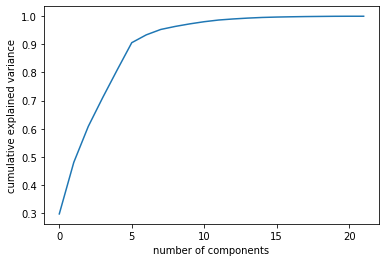

In [85]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## K Neighbors Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_parameters = {'n_neighbors':np.arange(1,40,1)}
knn_grid = GridSearchCV(knn, knn_parameters,cv=10)
knn_grid.fit(X_trn, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [87]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
knn_grid.best_score_

0.9253168316831684

In [89]:
knn_grid.best_params_

{'n_neighbors': 5}

## Using the best parameter for KNN Classifier

In [90]:
knn_test = KNeighborsClassifier(5)
knn_test.fit(X_trn, y_train)
print('Train score: {:.4f}'.format(knn_test.score(X_trn, y_train)))
print('Test score: {:.4f}'.format(knn_test.score(X_tst, y_test)))

Train score: 0.9423
Test score: 0.9224


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

y_predictknn = knn_test.predict(X_tst)

print(confusion_matrix(y_test, y_predictknn))
print(classification_report(y_test, y_predictknn))

[[303   1   0]
 [  9   2   3]
 [  9   4   4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       304
           1       0.29      0.14      0.19        14
           2       0.57      0.24      0.33        17

    accuracy                           0.92       335
   macro avg       0.60      0.46      0.50       335
weighted avg       0.90      0.92      0.90       335



## Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 0, solver = 'liblinear',multi_class='auto') 
logreg_parameters = {'penalty':('l1', 'l2'), 'C':[0.01, 0.1, 1, 10, 100]}
logreg_grid = GridSearchCV(logreg, logreg_parameters,cv=10)
logreg_grid.fit(X_trn, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
logreg_grid.cv_results_

{'mean_fit_time': array([0.00169537, 0.00139616, 0.00239334, 0.00209429, 0.00368981,
        0.00239735, 0.00508647, 0.00279176, 0.00528486, 0.00309341]),
 'std_fit_time': array([0.00089732, 0.00048873, 0.00048859, 0.00029929, 0.0004573 ,
        0.00049353, 0.00029907, 0.00039929, 0.00045692, 0.00029871]),
 'mean_score_time': array([0.00000000e+00, 3.98898125e-04, 0.00000000e+00, 3.98874283e-04,
        0.00000000e+00, 3.99184227e-04, 1.99556351e-04, 1.99556351e-04,
        1.99127197e-04, 9.95635986e-05]),
 'std_score_time': array([0.        , 0.00048855, 0.        , 0.00048852, 0.        ,
        0.0004889 , 0.00039911, 0.00039911, 0.00039826, 0.00029869]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1'

In [94]:
logreg_grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
logreg_grid.best_score_

0.9323366336633663

In [96]:
logreg_grid.best_params_

{'C': 1, 'penalty': 'l1'}

## Using best parameter for Logistic Regression

In [97]:
logreg_test = LogisticRegression(random_state = 0, solver = 'liblinear',multi_class='auto',C=1,penalty='l1')
logreg_test.fit(X_trn, y_train)
print('Train score: {:.4f}'.format(logreg_test.score(X_trn, y_train)))
print('Test score: {:.4f}'.format(logreg_test.score(X_tst, y_test)))

Train score: 0.9363
Test score: 0.9284


In [98]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_logreg = logreg_test.predict(X_tst)

print(confusion_matrix(y_test, y_predict_logreg))
print(classification_report(y_test, y_predict_logreg))

[[303   1   0]
 [  6   3   5]
 [ 12   0   5]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       304
           1       0.75      0.21      0.33        14
           2       0.50      0.29      0.37        17

    accuracy                           0.93       335
   macro avg       0.73      0.50      0.56       335
weighted avg       0.91      0.93      0.91       335



For multi-class classification, Softmax regression gives the best results compared to logistic regression.

Logistic Regression gives better results for binary classification but not for multi-class classification. 

## Softmax Regression

In [99]:
from sklearn.linear_model import LogisticRegression

softmax = LogisticRegression(random_state=0,solver = 'lbfgs',multi_class='multinomial')
softmax_parameters = { 'C':[0.01, 0.1, 1, 10, 100], 'max_iter' : np.logspace(3,4,3)}
softmax_grid = GridSearchCV(softmax, softmax_parameters,cv=10)
softmax_grid.fit(X_trn, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': array([ 1000.        ,  3162.27766017, 10000.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
softmax_grid.cv_results_

{'mean_fit_time': array([0.00538719, 0.00508986, 0.00438473, 0.0054858 , 0.00568554,
        0.00528233, 0.00897496, 0.01017377, 0.00917587, 0.01086922,
        0.01097171, 0.01127312, 0.01306562, 0.01186669, 0.01226723]),
 'std_fit_time': array([0.0012783 , 0.00053642, 0.00048679, 0.00049739, 0.00045534,
        0.00045038, 0.00063156, 0.00153273, 0.00058962, 0.00070181,
        0.00061978, 0.000779  , 0.00249761, 0.00094467, 0.00089685]),
 'mean_score_time': array([1.99508667e-04, 9.97781754e-05, 1.98864937e-04, 9.98020172e-05,
        0.00000000e+00, 1.00064278e-04, 2.99167633e-04, 1.98984146e-04,
        1.99079514e-04, 1.99770927e-04, 9.97543335e-05, 1.96218491e-04,
        3.98993492e-04, 9.99212265e-05, 2.99763680e-04]),
 'std_score_time': array([0.00039902, 0.00029933, 0.00039773, 0.00029941, 0.        ,
        0.00030019, 0.00045699, 0.00039824, 0.00039816, 0.00039954,
        0.00029926, 0.00039249, 0.00048867, 0.00029976, 0.00045791]),
 'param_C': masked_array(data=[0.01, 0

In [101]:
softmax_grid.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000.0,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
softmax_grid.best_score_

0.9353069306930692

In [103]:
softmax_grid.best_params_

{'C': 10, 'max_iter': 1000.0}

## Using best parameter for Softmax Regression

In [104]:
softmax_test = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='multinomial',C=10,max_iter= 1000)
softmax_test.fit(X_trn, y_train)
print('Train score: {:.4f}'.format(softmax_test.score(X_trn, y_train)))
print('Test score: {:.4f}'.format(softmax_test.score(X_tst, y_test)))

Train score: 0.9373
Test score: 0.9403


In [105]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_softmax = softmax_test.predict(X_tst)

print(confusion_matrix(y_test, y_predict_softmax))
print(classification_report(y_test, y_predict_softmax))

[[303   1   0]
 [  5   4   5]
 [  9   0   8]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       304
           1       0.80      0.29      0.42        14
           2       0.62      0.47      0.53        17

    accuracy                           0.94       335
   macro avg       0.79      0.58      0.64       335
weighted avg       0.93      0.94      0.93       335



# SVC
## Linear SVM

In [106]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [107]:
lins = LinearSVC(random_state = 0, dual=False)
lins_parameters = {'penalty':('l1', 'l2'), 'C':[0.001,0.01,0.1,1,10,100] }
lins_grid = GridSearchCV(lins, lins_parameters,cv=10,iid=True)
lins_grid.fit(X_trn, y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid=True, n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
lins_grid.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
          verbose=0)

In [109]:
lins_grid.best_score_

0.9293532338308458

In [110]:
lins_grid.best_params_

{'C': 1, 'penalty': 'l1'}

## Using best estimator for Linear SVM

In [111]:
lins_test = LinearSVC(random_state = 0,dual=False,C= 1, penalty= 'l1')
lins_test.fit(X_trn, y_train)
print('Train score: {:.4f}'.format(lins_test.score(X_trn, y_train)))
print('Test score: {:.4f}'.format(lins_test.score(X_tst, y_test)))

Train score: 0.9353
Test score: 0.9254


In [112]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_lins = lins_test.predict(X_tst)

print(confusion_matrix(y_test, y_predict_lins))
print(classification_report(y_test, y_predict_lins))

[[303   1   0]
 [  7   4   3]
 [ 11   3   3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       304
           1       0.50      0.29      0.36        14
           2       0.50      0.18      0.26        17

    accuracy                           0.93       335
   macro avg       0.65      0.49      0.53       335
weighted avg       0.90      0.93      0.91       335



## SVM using Linear Kernel

In [113]:
from sklearn.svm import SVC

svm=SVC(kernel='linear',random_state=0)
svm_parameters = {'gamma': [0.001, 0.01, 0.1, 1, 10], 'C': [0.001, 0.01, 0.1, 1, 10]}
svm_grid = GridSearchCV(svm, svm_parameters,cv=10)
svm_grid.fit(X_trn, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [114]:
svm_grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [115]:
svm_grid.best_score_

0.9293663366336633

In [116]:
svm_grid.best_params_

{'C': 10, 'gamma': 0.001}

## Using best parameters for Linear kernel svm

In [117]:
svm_test = SVC(kernel='linear',random_state=0,C= 10, gamma= 0.001)
svm_test.fit(X_trn, y_train)
print('Train score: {:.4f}'.format(svm_test.score(X_trn, y_train)))
print('Test score: {:.4f}'.format(svm_test.score(X_tst, y_test)))

Train score: 0.9393
Test score: 0.9403


In [118]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_svm = svm_test.predict(X_tst)

print(confusion_matrix(y_test, y_predict_svm))
print(classification_report(y_test, y_predict_svm))

[[303   1   0]
 [  5   5   4]
 [  9   1   7]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       304
           1       0.71      0.36      0.48        14
           2       0.64      0.41      0.50        17

    accuracy                           0.94       335
   macro avg       0.77      0.59      0.65       335
weighted avg       0.93      0.94      0.93       335



## SVM using RBF kernel

In [119]:
from sklearn.svm import SVC

rbf=SVC(kernel='rbf',random_state=0,gamma='auto')
rbf_parameters = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
rbf_grid = GridSearchCV(rbf, rbf_parameters,cv=10)
rbf_grid.fit(X_trn, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [120]:
rbf_grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [121]:
rbf_grid.best_score_

0.9343069306930692

In [122]:
rbf_grid.best_params_

{'C': 100, 'gamma': 0.1}

## Using best parameters for RBF kernel svm

In [123]:
rbf_test = SVC(kernel='rbf',random_state=0,C= 100, gamma= 0.1)
rbf_test.fit(X_trn, y_train)
print('Train score: {:.4f}'.format(rbf_test.score(X_trn, y_train)))
print('Test score: {:.4f}'.format(rbf_test.score(X_tst, y_test)))

Train score: 0.9493
Test score: 0.9373


In [124]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_rbf = rbf_test.predict(X_tst)

print(confusion_matrix(y_test, y_predict_rbf))
print(classification_report(y_test, y_predict_rbf))

[[303   1   0]
 [  7   5   2]
 [ 10   1   6]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       304
           1       0.71      0.36      0.48        14
           2       0.75      0.35      0.48        17

    accuracy                           0.94       335
   macro avg       0.80      0.57      0.64       335
weighted avg       0.93      0.94      0.93       335



## SVM using Poly kernel

In [125]:
from sklearn.svm import SVC

poly=SVC(kernel='poly',random_state=0,gamma='auto')
poly_parameters = {'gamma': [0.001, 0.01, 0.1, 1, 10], 'C': [0.01, 0.01, 0.1, 1, 10],'degree':[1, 2, 3, 4, 5]}
poly_grid = GridSearchCV(poly, poly_parameters,cv=10)
poly_grid.fit(X_trn, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='poly', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.01, 0.1, 1, 10],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [126]:
poly_grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [127]:
poly_grid.best_score_

0.9323366336633663

In [128]:
poly_grid.best_params_

{'C': 10, 'degree': 1, 'gamma': 10}

## Using best parameters for poly kernel svm

In [129]:
poly_test = SVC(kernel='poly',random_state=0,C= 10, gamma= 10,degree=1)
poly_test.fit(X_trn, y_train)
print('Train score: {:.4f}'.format(poly_test.score(X_trn, y_train)))
print('Test score: {:.4f}'.format(poly_test.score(X_tst, y_test)))

Train score: 0.9403
Test score: 0.9433


In [130]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_poly = poly_test.predict(X_tst)

print(confusion_matrix(y_test, y_predict_poly))
print(classification_report(y_test, y_predict_poly))

[[303   1   0]
 [  5   6   3]
 [  9   1   7]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       304
           1       0.75      0.43      0.55        14
           2       0.70      0.41      0.52        17

    accuracy                           0.94       335
   macro avg       0.80      0.61      0.68       335
weighted avg       0.93      0.94      0.93       335



## Decision Tree Classifier

In [131]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=0)
dtc_parameters = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 6, 7],
                  'max_features': [1, 2, 3, 4, 5, 6],
                  'min_samples_split':[5, 10, 15, 20, 25],
                  'min_samples_leaf':[1, 2, 3, 4, 5, 6]}
dtc_grid = GridSearchCV(dtc, dtc_parameters,cv=10)
dtc_grid.fit(X_trn, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
      

In [132]:
dtc_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [133]:
dtc_grid.best_score_

0.9313168316831684

In [134]:
dtc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

## Using best parameters for Decision tree classifier

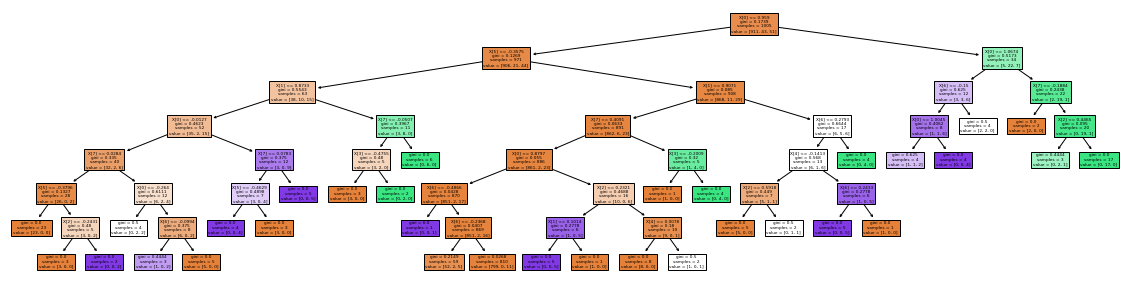

In [135]:
dtc_test = DecisionTreeClassifier(random_state=0,max_depth=7 ,criterion='gini',max_features=5,min_samples_leaf=1,min_samples_split=5,splitter='best')
dtc_test.fit(X_trn, y_train)

plt.figure(figsize = (20,5))
tree.plot_tree(dtc_test,precision=4,impurity=True,filled=True)
plt.show()

In [136]:
print('Train score: {:.4f}'.format(dtc_test.score(X_trn, y_train)))
print('Test score: {:.4f}'.format(dtc_test.score(X_tst, y_test)))

Train score: 0.9721
Test score: 0.9254


In [137]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_dtc = dtc_test.predict(X_tst)

print(confusion_matrix(y_test, y_predict_dtc))
print(classification_report(y_test, y_predict_dtc))

[[297   2   5]
 [  5   6   3]
 [  8   2   7]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       304
           1       0.60      0.43      0.50        14
           2       0.47      0.41      0.44        17

    accuracy                           0.93       335
   macro avg       0.67      0.61      0.63       335
weighted avg       0.92      0.93      0.92       335



## Does PCA give better results?

#### Project1 test-scores:

1. knn- Test score: 0.9224
2. logistic- Test score: 0.9433
3. softmax- Test score: 0.9433
4. linearSVC- Test score: 0.9403
5. linear kernel SVC- Test score: 0.9403
6. rbf-kernel-SVC- Test score: 0.9463
7. poly-kernel-SVC- Test score: 0.9433
8. Decision Tree- Test score: 0.9134

In [138]:
print('knn- Test score: {:.4f}'.format(knn_test.score(X_tst, y_test)))
print('logistic- Test score: {:.4f}'.format(logreg_test.score(X_tst, y_test)))
print('softmax- Test score: {:.4f}'.format(softmax_test.score(X_tst, y_test)))
print('linearSVC- Test score: {:.4f}'.format(lins_test.score(X_tst, y_test)))
print('linear kernel SVC- Test score: {:.4f}'.format(svm_test.score(X_tst, y_test)))
print('rbf-kernel-SVC- Test score: {:.4f}'.format(rbf_test.score(X_tst, y_test)))
print('poly-kernel-SVC- Test score: {:.4f}'.format(poly_test.score(X_tst, y_test)))
print('Decision Tree- Test score: {:.4f}'.format(dtc_test.score(X_tst, y_test)))

knn- Test score: 0.9224
logistic- Test score: 0.9284
softmax- Test score: 0.9403
linearSVC- Test score: 0.9254
linear kernel SVC- Test score: 0.9403
rbf-kernel-SVC- Test score: 0.9373
poly-kernel-SVC- Test score: 0.9433
Decision Tree- Test score: 0.9254


Previously the best model is RBF kernel SVC but now after applying PCA, the best model is Poly kernel SVC.

On application of PCA, computation became relatively faster.

#### On application of PCA, the results (accuracies) of
1. Knn, linear kernel SVC and poly kernel SVC remained same.
2. Logistic, Softmax, linearSVC, rbf kernel SVC are decreased.
3. Decision tree is improved.

## Deep Learning models

## Applying Grid Search on Keras Classifier using 'adam' optimizer

In [139]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor

Using TensorFlow backend.


In [140]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(30, input_dim=22, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [141]:
seed = 10
np.random.seed(10)

In [142]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 10)

In [143]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)

grid_search_result = grid_search.fit(X_train, train_labels)

In [144]:
grid_search_result.best_params_

{'batch_size': 20, 'epochs': 100}

## Using best parameters for Keras Classifier using 'adam' optimizer

In [145]:
# create model
dn = Sequential()
dn.add(Dense(30, input_dim=22, activation='relu'))
dn.add(Dense(15, activation='relu'))
dn.add(Dense(3, activation='softmax'))

In [146]:
# Compile model
dn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [147]:
# Fit model
dn.fit(X_train, train_labels, epochs = 100, batch_size = 20)

Epoch 1/100
1005/1005 [==============================] - 0s 132us/step - loss: 0.7571 - accuracy: 0.8050
Epoch 2/100
1005/1005 [==============================] - 0s 51us/step - loss: 0.4431 - accuracy: 0.9065
Epoch 3/100
1005/1005 [==============================] - 0s 58us/step - loss: 0.3967 - accuracy: 0.9065
Epoch 4/100
1005/1005 [==============================] - 0s 61us/step - loss: 0.3583 - accuracy: 0.9065
Epoch 5/100
1005/1005 [==============================] - 0s 60us/step - loss: 0.3234 - accuracy: 0.9065
Epoch 6/100
1005/1005 [==============================] - 0s 59us/step - loss: 0.2937 - accuracy: 0.9065
Epoch 7/100
1005/1005 [==============================] - 0s 56us/step - loss: 0.2684 - accuracy: 0.9085
Epoch 8/100
1005/1005 [==============================] - 0s 68us/step - loss: 0.2523 - accuracy: 0.9154
Epoch 9/100
1005/1005 [==============================] - 0s 50us/step - loss: 0.2371 - accuracy: 0.9214
Epoch 10/100
1005/1005 [==============================] - 0s 70

In [148]:
# Evaluate model
from keras.utils import to_categorical
test_labels = to_categorical(y_test)

scores= dn.evaluate(X_test, test_labels)
print("\n%s: %.2f%%" % (dn.metrics_names[1], scores[1]*100))

335/335 [==============================] - 0s 89us/step

accuracy: 94.93%


In [149]:
# Predict
y_predict_dn = dn.predict_classes(X_test)
y_predict_dn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [150]:
print(confusion_matrix(y_test, y_predict_dn))
print(classification_report(y_test, y_predict_dn))

[[304   0   0]
 [  5   5   4]
 [  7   1   9]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       304
           1       0.83      0.36      0.50        14
           2       0.69      0.53      0.60        17

    accuracy                           0.95       335
   macro avg       0.83      0.63      0.69       335
weighted avg       0.94      0.95      0.94       335



## Applying Grid Search on Keras Classifier using 'sgd' optimizer

In [151]:
def create_smodel():
    #create model
    smodel = Sequential()
    smodel.add(Dense(30, input_dim=22, activation='relu'))
    smodel.add(Dense(15, activation='relu'))
    smodel.add(Dense(3, activation='softmax'))
    #compile model
    smodel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return smodel

In [152]:
seed = 10
np.random.seed(10)

In [153]:
smodel = KerasClassifier(build_fn = create_smodel, verbose = 0)

sparam_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
sgrid_search = GridSearchCV(estimator= smodel, param_grid = sparam_grid, cv = 10)

In [154]:
grid_search_sgd = sgrid_search.fit(X_train, train_labels)

In [155]:
grid_search_sgd.best_params_

{'batch_size': 10, 'epochs': 100}

## Using best parameters for Keras Classifier using 'sgd' optimizer

In [156]:
# create model
sdn = Sequential()
sdn.add(Dense(30, input_dim=22, activation='relu'))
sdn.add(Dense(15, activation='relu'))
sdn.add(Dense(3, activation='softmax'))

In [157]:
# Compile model
sdn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [158]:
# Fit model
sdn.fit(X_train, train_labels, epochs = 100, batch_size = 10)

Epoch 1/100
1005/1005 [==============================] - 0s 85us/step - loss: 0.8503 - accuracy: 0.8189
Epoch 2/100
1005/1005 [==============================] - 0s 49us/step - loss: 0.5406 - accuracy: 0.9065
Epoch 3/100
1005/1005 [==============================] - 0s 51us/step - loss: 0.4350 - accuracy: 0.9065
Epoch 4/100
1005/1005 [==============================] - 0s 51us/step - loss: 0.4074 - accuracy: 0.9065
Epoch 5/100
1005/1005 [==============================] - 0s 50us/step - loss: 0.3981 - accuracy: 0.9065
Epoch 6/100
1005/1005 [==============================] - 0s 51us/step - loss: 0.3921 - accuracy: 0.9065
Epoch 7/100
1005/1005 [==============================] - 0s 50us/step - loss: 0.3863 - accuracy: 0.9065
Epoch 8/100
1005/1005 [==============================] - 0s 52us/step - loss: 0.3809 - accuracy: 0.9065
Epoch 9/100
1005/1005 [==============================] - 0s 50us/step - loss: 0.3752 - accuracy: 0.9065
Epoch 10/100
1005/1005 [==============================] - 0s 56u

In [159]:
# Evaluate model
score= sdn.evaluate(X_test, test_labels)
print("\n%s: %.2f%%" % (sdn.metrics_names[1], score[1]*100))

335/335 [==============================] - 0s 65us/step

accuracy: 92.54%


In [160]:
# predict
y_predict_sdn = sdn.predict_classes(X_test)
y_predict_sdn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [161]:
print(confusion_matrix(y_test, y_predict_sdn))
print(classification_report(y_test, y_predict_sdn))

[[304   0   0]
 [  8   6   0]
 [ 13   4   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       304
           1       0.60      0.43      0.50        14
           2       0.00      0.00      0.00        17

    accuracy                           0.93       335
   macro avg       0.51      0.48      0.49       335
weighted avg       0.87      0.93      0.90       335



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## on PCA data

## Applying Grid Search on Keras Classifier using 'adam' optimizer

In [162]:
def create_model1():
    #create model
    model1 = Sequential()
    model1.add(Dense(30, input_dim=8, activation='relu'))
    model1.add(Dense(15, activation='relu'))
    model1.add(Dense(3, activation='softmax'))
    #compile model
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model1

In [163]:
seed = 10
np.random.seed(10)

In [164]:
model1 = KerasClassifier(build_fn = create_model1, verbose = 0)

param_grid1 = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search1 = GridSearchCV(estimator= model1, param_grid = param_grid1, cv = 10)

In [165]:
grid_search_result1 = grid_search1.fit(X_trn, train_labels)

In [166]:
grid_search_result1.best_params_

{'batch_size': 10, 'epochs': 100}

## Using best parameters for Keras Classifier using 'adam' optimizer

In [167]:
# create model
dn1 = Sequential()
dn1.add(Dense(30, input_dim=8, activation='relu'))
dn1.add(Dense(15, activation='relu'))
dn1.add(Dense(3, activation='softmax'))

In [168]:
# Compile model
dn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [169]:
# Fit-model
dn1.fit(X_trn, train_labels, epochs = 100, batch_size = 10)

Epoch 1/100
1005/1005 [==============================] - 0s 289us/step - loss: 0.7493 - accuracy: 0.8109
Epoch 2/100
1005/1005 [==============================] - 0s 178us/step - loss: 0.3228 - accuracy: 0.9065
Epoch 3/100
1005/1005 [==============================] - 0s 157us/step - loss: 0.2546 - accuracy: 0.9075
Epoch 4/100
1005/1005 [==============================] - 0s 148us/step - loss: 0.2274 - accuracy: 0.9184
Epoch 5/100
1005/1005 [==============================] - 0s 136us/step - loss: 0.2097 - accuracy: 0.9254
Epoch 6/100
1005/1005 [==============================] - 0s 151us/step - loss: 0.1978 - accuracy: 0.9294
Epoch 7/100
1005/1005 [==============================] - 0s 142us/step - loss: 0.1886 - accuracy: 0.9294
Epoch 8/100
1005/1005 [==============================] - 0s 152us/step - loss: 0.1835 - accuracy: 0.9303
Epoch 9/100
1005/1005 [==============================] - 0s 141us/step - loss: 0.1768 - accuracy: 0.9284
Epoch 10/100
1005/1005 [==============================]

In [170]:
# Evaluate model
scores1= dn1.evaluate(X_tst, test_labels)
print("\n%s: %.2f%%" % (dn1.metrics_names[1], scores1[1]*100))

335/335 [==============================] - 0s 83us/step

accuracy: 93.13%


In [171]:
# predict
y_predict_dn1 = dn1.predict_classes(X_tst)
y_predict_dn1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [172]:
print(confusion_matrix(y_test, y_predict_dn1))
print(classification_report(y_test, y_predict_dn1))

[[301   2   1]
 [  4   3   7]
 [  8   1   8]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       304
           1       0.50      0.21      0.30        14
           2       0.50      0.47      0.48        17

    accuracy                           0.93       335
   macro avg       0.65      0.56      0.59       335
weighted avg       0.92      0.93      0.92       335



## On PCA data

## Applying Grid Search on Keras Classifier using 'sgd' optimizer

In [173]:
def create_smodel1():
    #create model
    smodel1 = Sequential()
    smodel1.add(Dense(30, input_dim=8, activation='relu'))
    smodel1.add(Dense(15, activation='relu'))
    smodel1.add(Dense(3, activation='softmax'))
    #compile model
    smodel1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return smodel1

In [174]:
seed = 10
np.random.seed(10)

In [175]:
smodel1 = KerasClassifier(build_fn = create_smodel1, verbose = 0)

sparam_grid1 = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
sgrid_search1 = GridSearchCV(estimator= smodel1, param_grid = sparam_grid1, cv = 10)

In [176]:
grid_search_sgd1 = sgrid_search1.fit(X_trn, train_labels)

In [177]:
grid_search_sgd1.best_params_

{'batch_size': 20, 'epochs': 100}

## Using best parameters for Keras Classifier using 'sgd' optimizer

In [178]:
# create model
sdn1 = Sequential()
sdn1.add(Dense(30, input_dim=8, activation='relu'))
sdn1.add(Dense(15, activation='relu'))
sdn1.add(Dense(3, activation='softmax'))

In [179]:
# Compile model
sdn1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [180]:
# Fit model
sdn1.fit(X_trn, train_labels, epochs = 100, batch_size = 20)

Epoch 1/100
1005/1005 [==============================] - 0s 127us/step - loss: 0.8933 - accuracy: 0.7761
Epoch 2/100
1005/1005 [==============================] - 0s 93us/step - loss: 0.5723 - accuracy: 0.9065
Epoch 3/100
1005/1005 [==============================] - 0s 85us/step - loss: 0.4381 - accuracy: 0.9065
Epoch 4/100
1005/1005 [==============================] - 0s 84us/step - loss: 0.3808 - accuracy: 0.9065
Epoch 5/100
1005/1005 [==============================] - 0s 82us/step - loss: 0.3547 - accuracy: 0.9065
Epoch 6/100
1005/1005 [==============================] - 0s 85us/step - loss: 0.3394 - accuracy: 0.9065
Epoch 7/100
1005/1005 [==============================] - 0s 84us/step - loss: 0.3267 - accuracy: 0.9065
Epoch 8/100
1005/1005 [==============================] - 0s 86us/step - loss: 0.3147 - accuracy: 0.9065
Epoch 9/100
1005/1005 [==============================] - 0s 82us/step - loss: 0.3024 - accuracy: 0.9065
Epoch 10/100
1005/1005 [==============================] - ETA: 

In [181]:
# Evaluate model
score1= sdn1.evaluate(X_tst, test_labels)
print("\n%s: %.2f%%" % (sdn1.metrics_names[1], score1[1]*100))

335/335 [==============================] - 0s 95us/step

accuracy: 94.33%


In [182]:
# predict
y_predict_sdn1 = sdn1.predict_classes(X_tst)
y_predict_sdn1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [183]:
print(confusion_matrix(y_test, y_predict_sdn1))
print(classification_report(y_test, y_predict_sdn1))

[[303   1   0]
 [  5   5   4]
 [  8   1   8]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       304
           1       0.71      0.36      0.48        14
           2       0.67      0.47      0.55        17

    accuracy                           0.94       335
   macro avg       0.78      0.61      0.67       335
weighted avg       0.93      0.94      0.93       335

